# Volatility
- Different ways to look at it
- Here we will use: Average True Range (ATR)

### What is Volatility?
- Volatility has a number of different meanings
- We use it in relation to price movement
- Can be thought as the equivalent as risk

### Resourses
- Volatility https://www.investopedia.com/terms/v/volatility.asp
- Average True Range https://www.investopedia.com/terms/a/atr.asp
- Matplotlib http://matplotlib.org (https://youtu.be/2ywUfs0rgtU)

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000
2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500,339.260010


### Formula
$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close


In [10]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

In [13]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [15]:
true_range = np.max(df, axis=1)

In [18]:
average_true_range = true_range.rolling(14).mean()

In [19]:
average_true_range

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2021-02-18    13.695007
2021-02-19    13.649292
2021-02-22    13.482862
2021-02-23    14.462145
2021-02-24    14.857858
Length: 289, dtype: float64

In [20]:
true_range.rolling(14).sum()/14

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2021-02-18    13.695007
2021-02-19    13.649292
2021-02-22    13.482862
2021-02-23    14.462145
2021-02-24    14.857858
Length: 289, dtype: float64

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


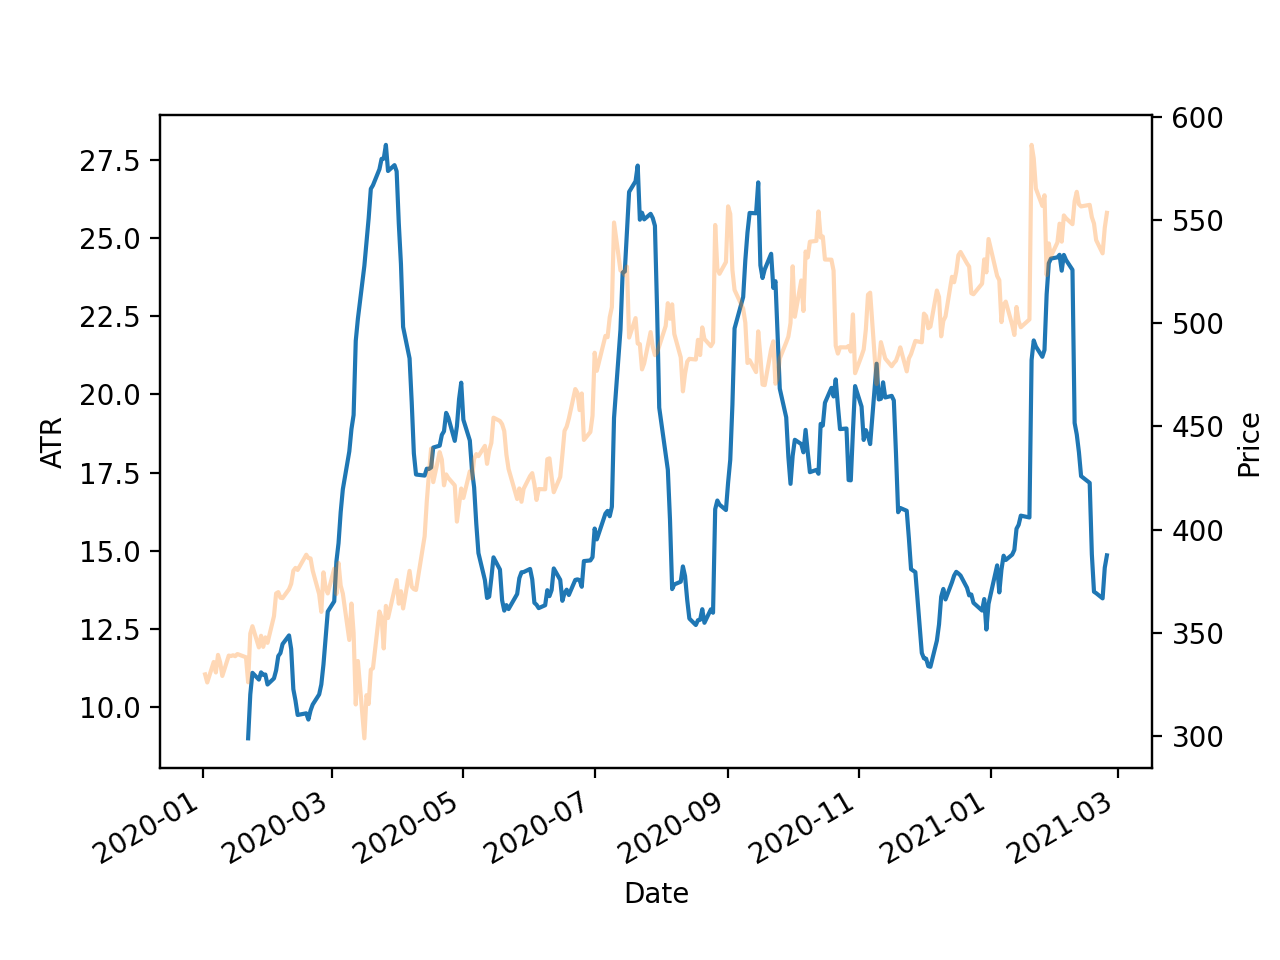

Text(0, 0.5, 'Price')

In [24]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")